
# Cross-section along a transect
:func:`pygmt.project` and :func:`pygmt.grdtrack` can be used to focus on
a quantity and its variation along a desired survey line.
In this example, the elevation is extracted from a grid provided via
:func:`pygmt.datasets.load_earth_relief`.
The figure consists of two parts, a map of the elevation in the study
area showing the survey line and a Cartesian plot showing the elevation
along the survey line.

*This example is orientated on an example in the GMT/China documentation*:
https://docs.gmt-china.org/latest/examples/ex026/


grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.5.5 at 05x05 arc minutes reduced by Gaussian Cartesian filtering (26.2 km fullwidth) [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 180x180 degree grid tile (earth_relief_05m_g): S90W180


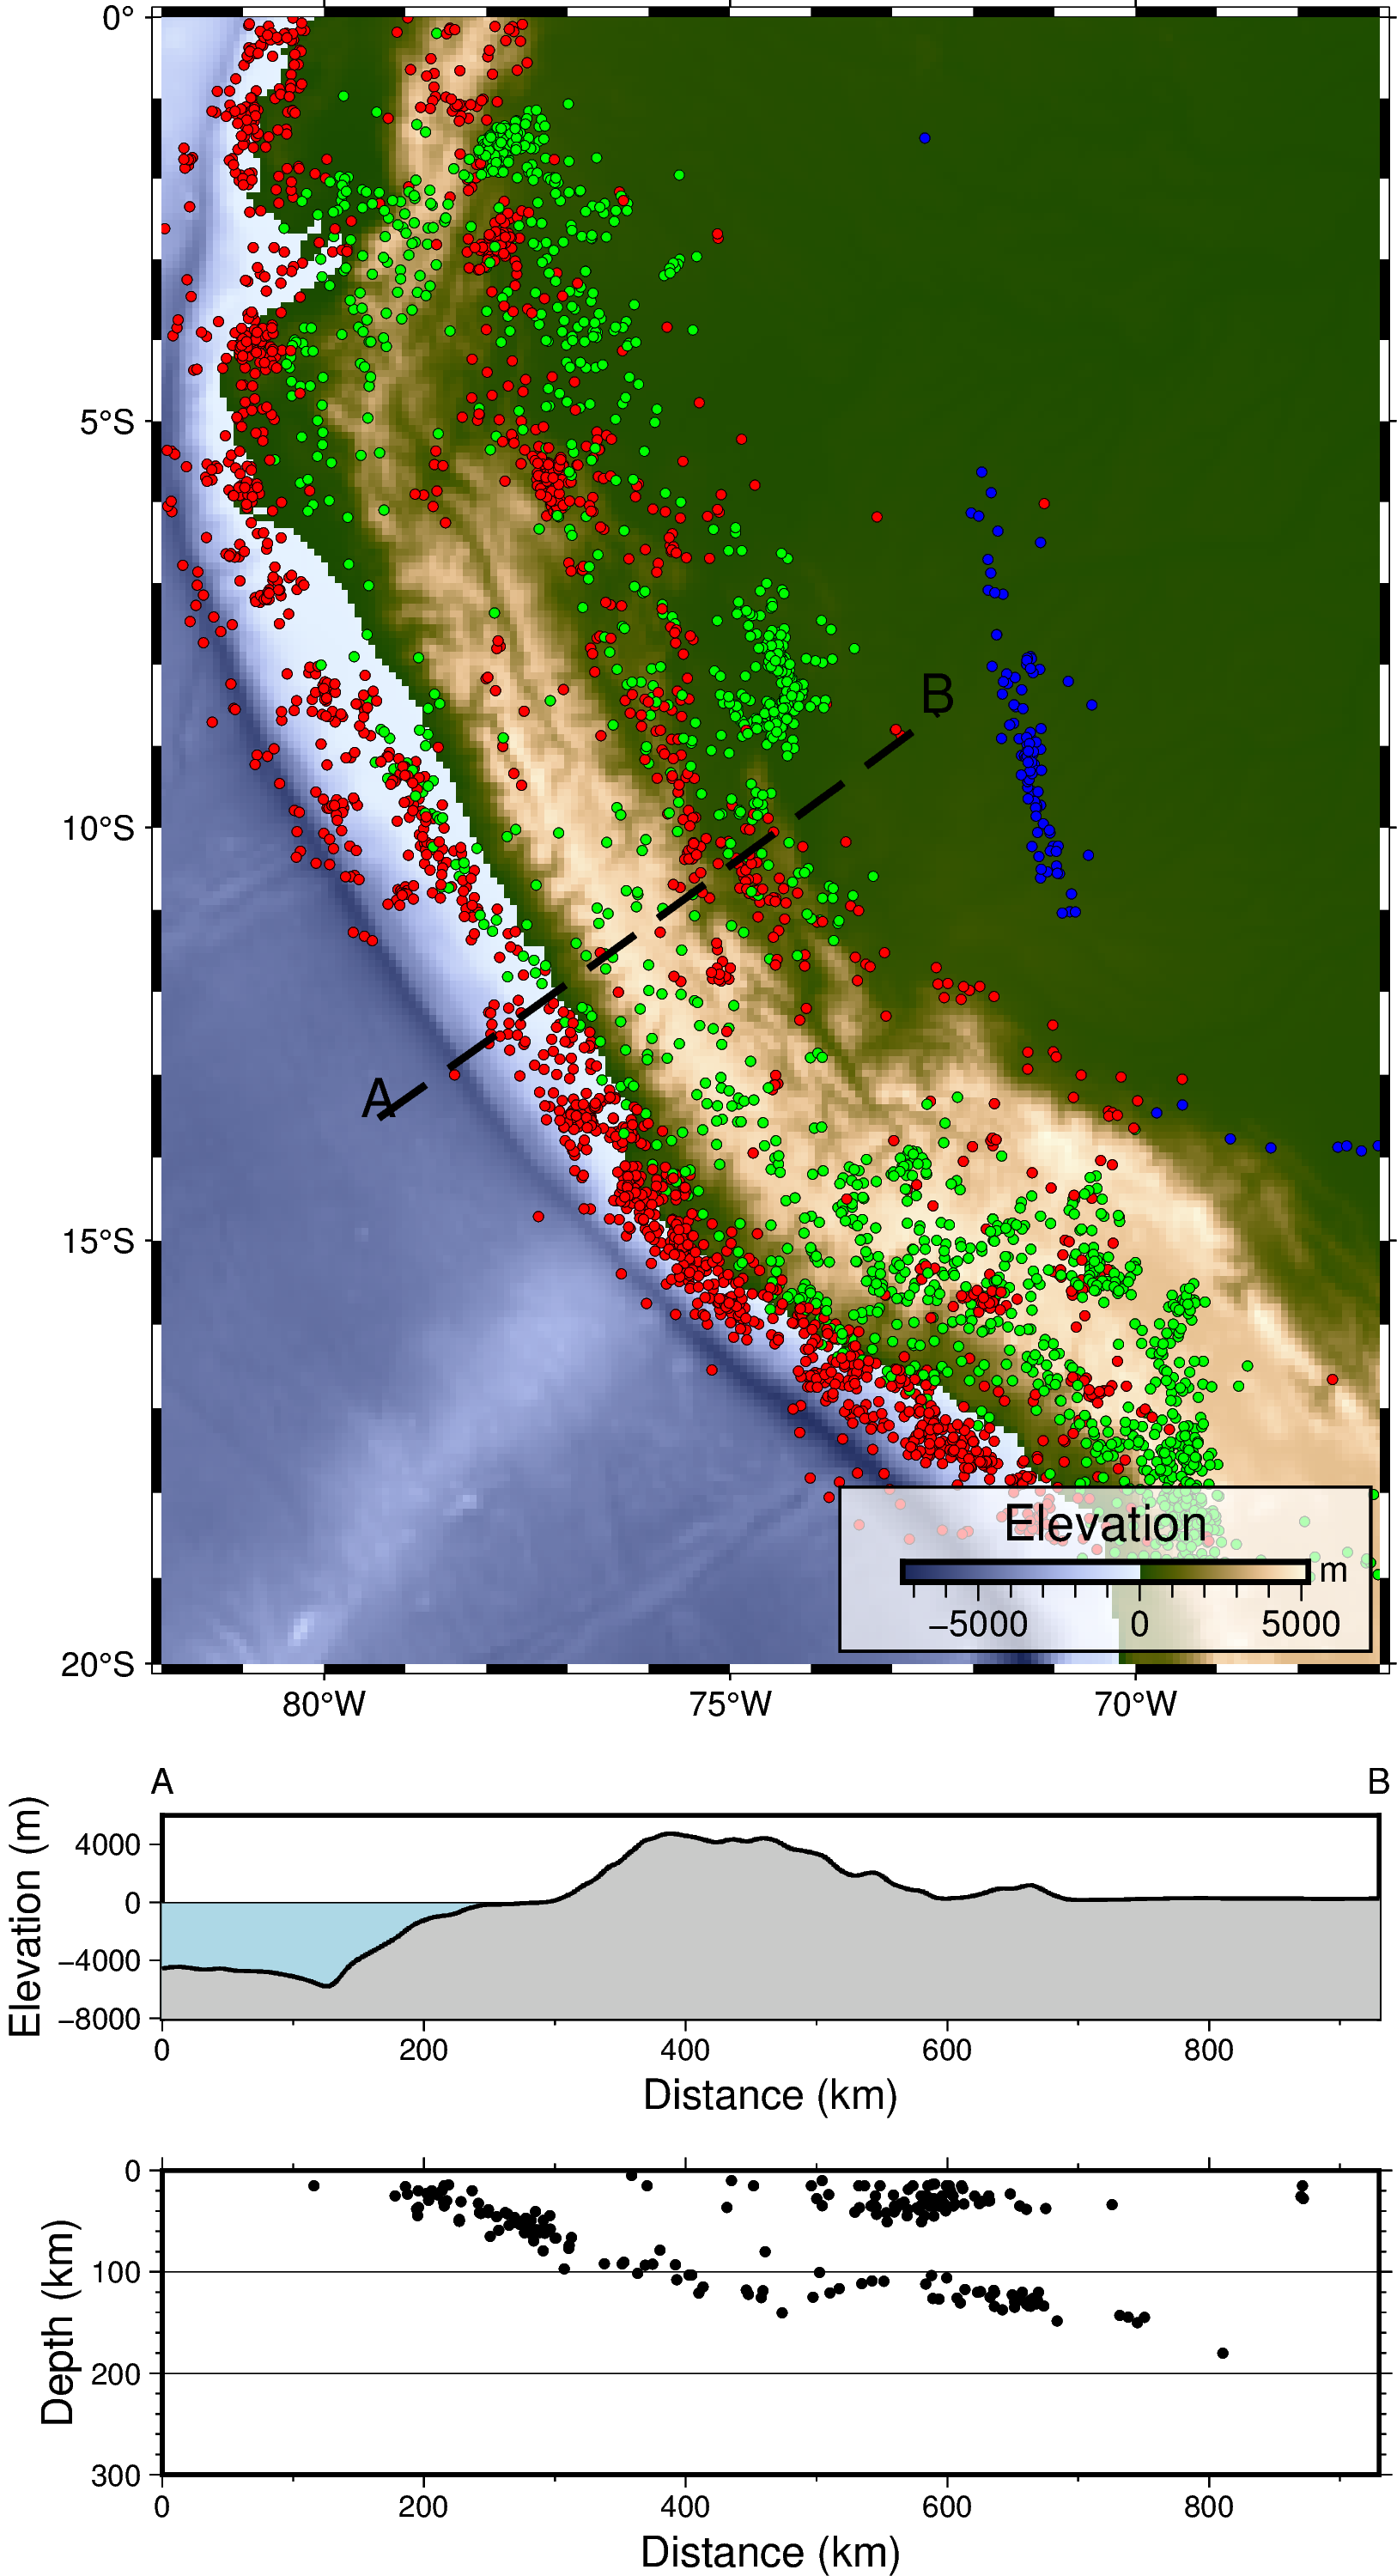

In [43]:
import pygmt

# Define region of study area
# lon_min, lon_max, lat_min, lat_max in degrees East and North
region_map = [-82, -67, -20, 0]

# Create a new pygmt.Figure instance
fig = pygmt.Figure()

# ----------------------------------------------------------------------------
# Bottom: Map of elevation in study area

# Set up basic map
fig.basemap(
    region=region_map,
    projection="M12c",  # Mercator projection with a width of 12 centimeters
    frame="af",
)

# Download grid for Earth relief with a resolution of 10 arc-minutes and
# gridline registration [Default]
grid_map = pygmt.datasets.load_earth_relief(
    resolution="05m",
    region=region_map,
)

# Plot the downloaded grid with color-coding based on the elevation
fig.grdimage(grid=grid_map, cmap="oleron")

#Add earthquakes from the ISC catalog
#Make a palette of color
pygmt.makecpt(cmap="red,green,blue", series="0,60,300,10000", output="quakes.cpt")

#Plot earthqukes
fig.plot(data="Catalogo_ISC-EHB.txt", pen="faint", style="c0.1", cmap="quakes.cpt")

# Add a colorbar for the elevation
fig.colorbar(
    # Place the colorbar inside the plot (lower-case "j") with justification
    # Bottom Right and an offset ("+o") of 0.7 centimeters and
    # 0.3 centimeters in x or y directions, respectively
    # Move the x label above the horizontal colorbar ("+ml")
    position="jBR+o0.7c/0.8c+h+w4c/0.2c+ml",
    # Add a box around the colobar with a fill ("+g") in "white" color and
    # a transparency ("@") of 30 % and with a 0.8-points thick black
    # outline ("+p")
    box="+gwhite@30+p0.8p,black",
    # Add x and y labels ("+l")
    frame=["x+lElevation", "y+lm"],
)

# Choose a survey line
fig.plot(
    x=[-79.33, -72.44],  # Longitude in degrees East
    y=[-13.53, -8.60],  # Latitude in degrees North
    # Draw a 2-points thick red dashed line for the survey line
    pen="2p,black,dashed",
)

# Add labels "A" and "B" for the start and end points of the survey line
fig.text(
    x=[-79.33, -72.44],
    y=[-13.53, -8.60],
    text=["A", "B"],
    offset="0c/0.2c",  # Move text 0.2 centimeters up (y direction)
    font="15p",  # Use a font size of 15 points
)

# ----------------------------------------------------------------------------
# Top: Elevation along survey line

# Shift plot origin 17.5 centimeters to the top
fig.shift_origin(yshift="-3.5c")

fig.basemap(
    region=[0, 930, -8000, 6000],  # x_min, x_max, y_min, y_max
    # Cartesian projection with a width of 12 centimeters and
    # a height of 3 centimeters
    projection="X12c/2c",
    # Add annotations ("a") and ticks ("f") as well as labels ("+l")
    # at the west or left and south or bottom sides ("WSrt")
    frame=["WSrt", "xa200f100+lDistance (km)", "ya4000+lElevation (m)"],
)

# Add labels "A" and "B" for the start and end points of the survey line
fig.text(
    x=[0, 930],
    y=[7000, 7000],
    text=["A", "B"],
    offset="0c/0.2c",
    no_clip=True,  # Do not clip text that fall outside the plot bounds
    font="10p",  # Use a font size of 10 points
)

# Generate points along a great circle corresponding to the survey line
# and store them in a pandas.DataFrame
track_df = pygmt.project(
    center="-79.33/-13.53",  # Start point of survey line (longitude/latitude)
    endpoint="-72.44/-8.60",  # End point of survey line (longitude/latitude)
    generate="0.1",  # Output data in steps of 0.1 degrees
    unit=True, #True means distance in km
)

# Extract the elevation at the generated points from the downloaded grid
# and add it as new column "elevation" to the pandas.DataFrame
track_df = pygmt.grdtrack(
    grid=grid_map,
    points=track_df,
    newcolname="elevation",
)
#print(track_df)
# Plot water masses
fig.plot(
    x=[0, 930],
    y=[0, 0],
    fill="lightblue",  # Fill the polygon in "lightblue"
    # Draw a 0.25-points thick black solid outline
    pen="0.25p,black,solid",
    close="+y-8000",  # Force closed polygon
)

# Plot elevation along the survey line
fig.plot(
    x=track_df.p,
    y=track_df.elevation,
    fill="gray",  # Fill the polygon in "gray"
    # Draw a 1-point thick black solid outline
    pen="1p,black,solid",
    close="+y-8000",  # Force closed polygon
)

# Plot earthquake cross section
fig.shift_origin(yshift="-4.5c")
pygmt.project(
    data="Catalogo_ISC-EHB.txt",
    unit=True,
    center=[-79.33, -13.53],
    endpoint=[-72.44, -8.60],
    convention="pz",
    width=[-100, 100],
    length="w",
    outfile="cross.dat",
    sort=True,
)
fig.basemap(
    projection="X12c/-3c",
    region=[0,930, 0, 300],
    frame=['xaf100+l"Distance (km)"', 'ya100fg100+l"Depth (km)"', "WSen"],
)
fig.plot(data="cross.dat", projection="X", style="c0.1", pen=0.1, fill="black")

fig.savefig(fname="Peru.pdf")
fig.show()

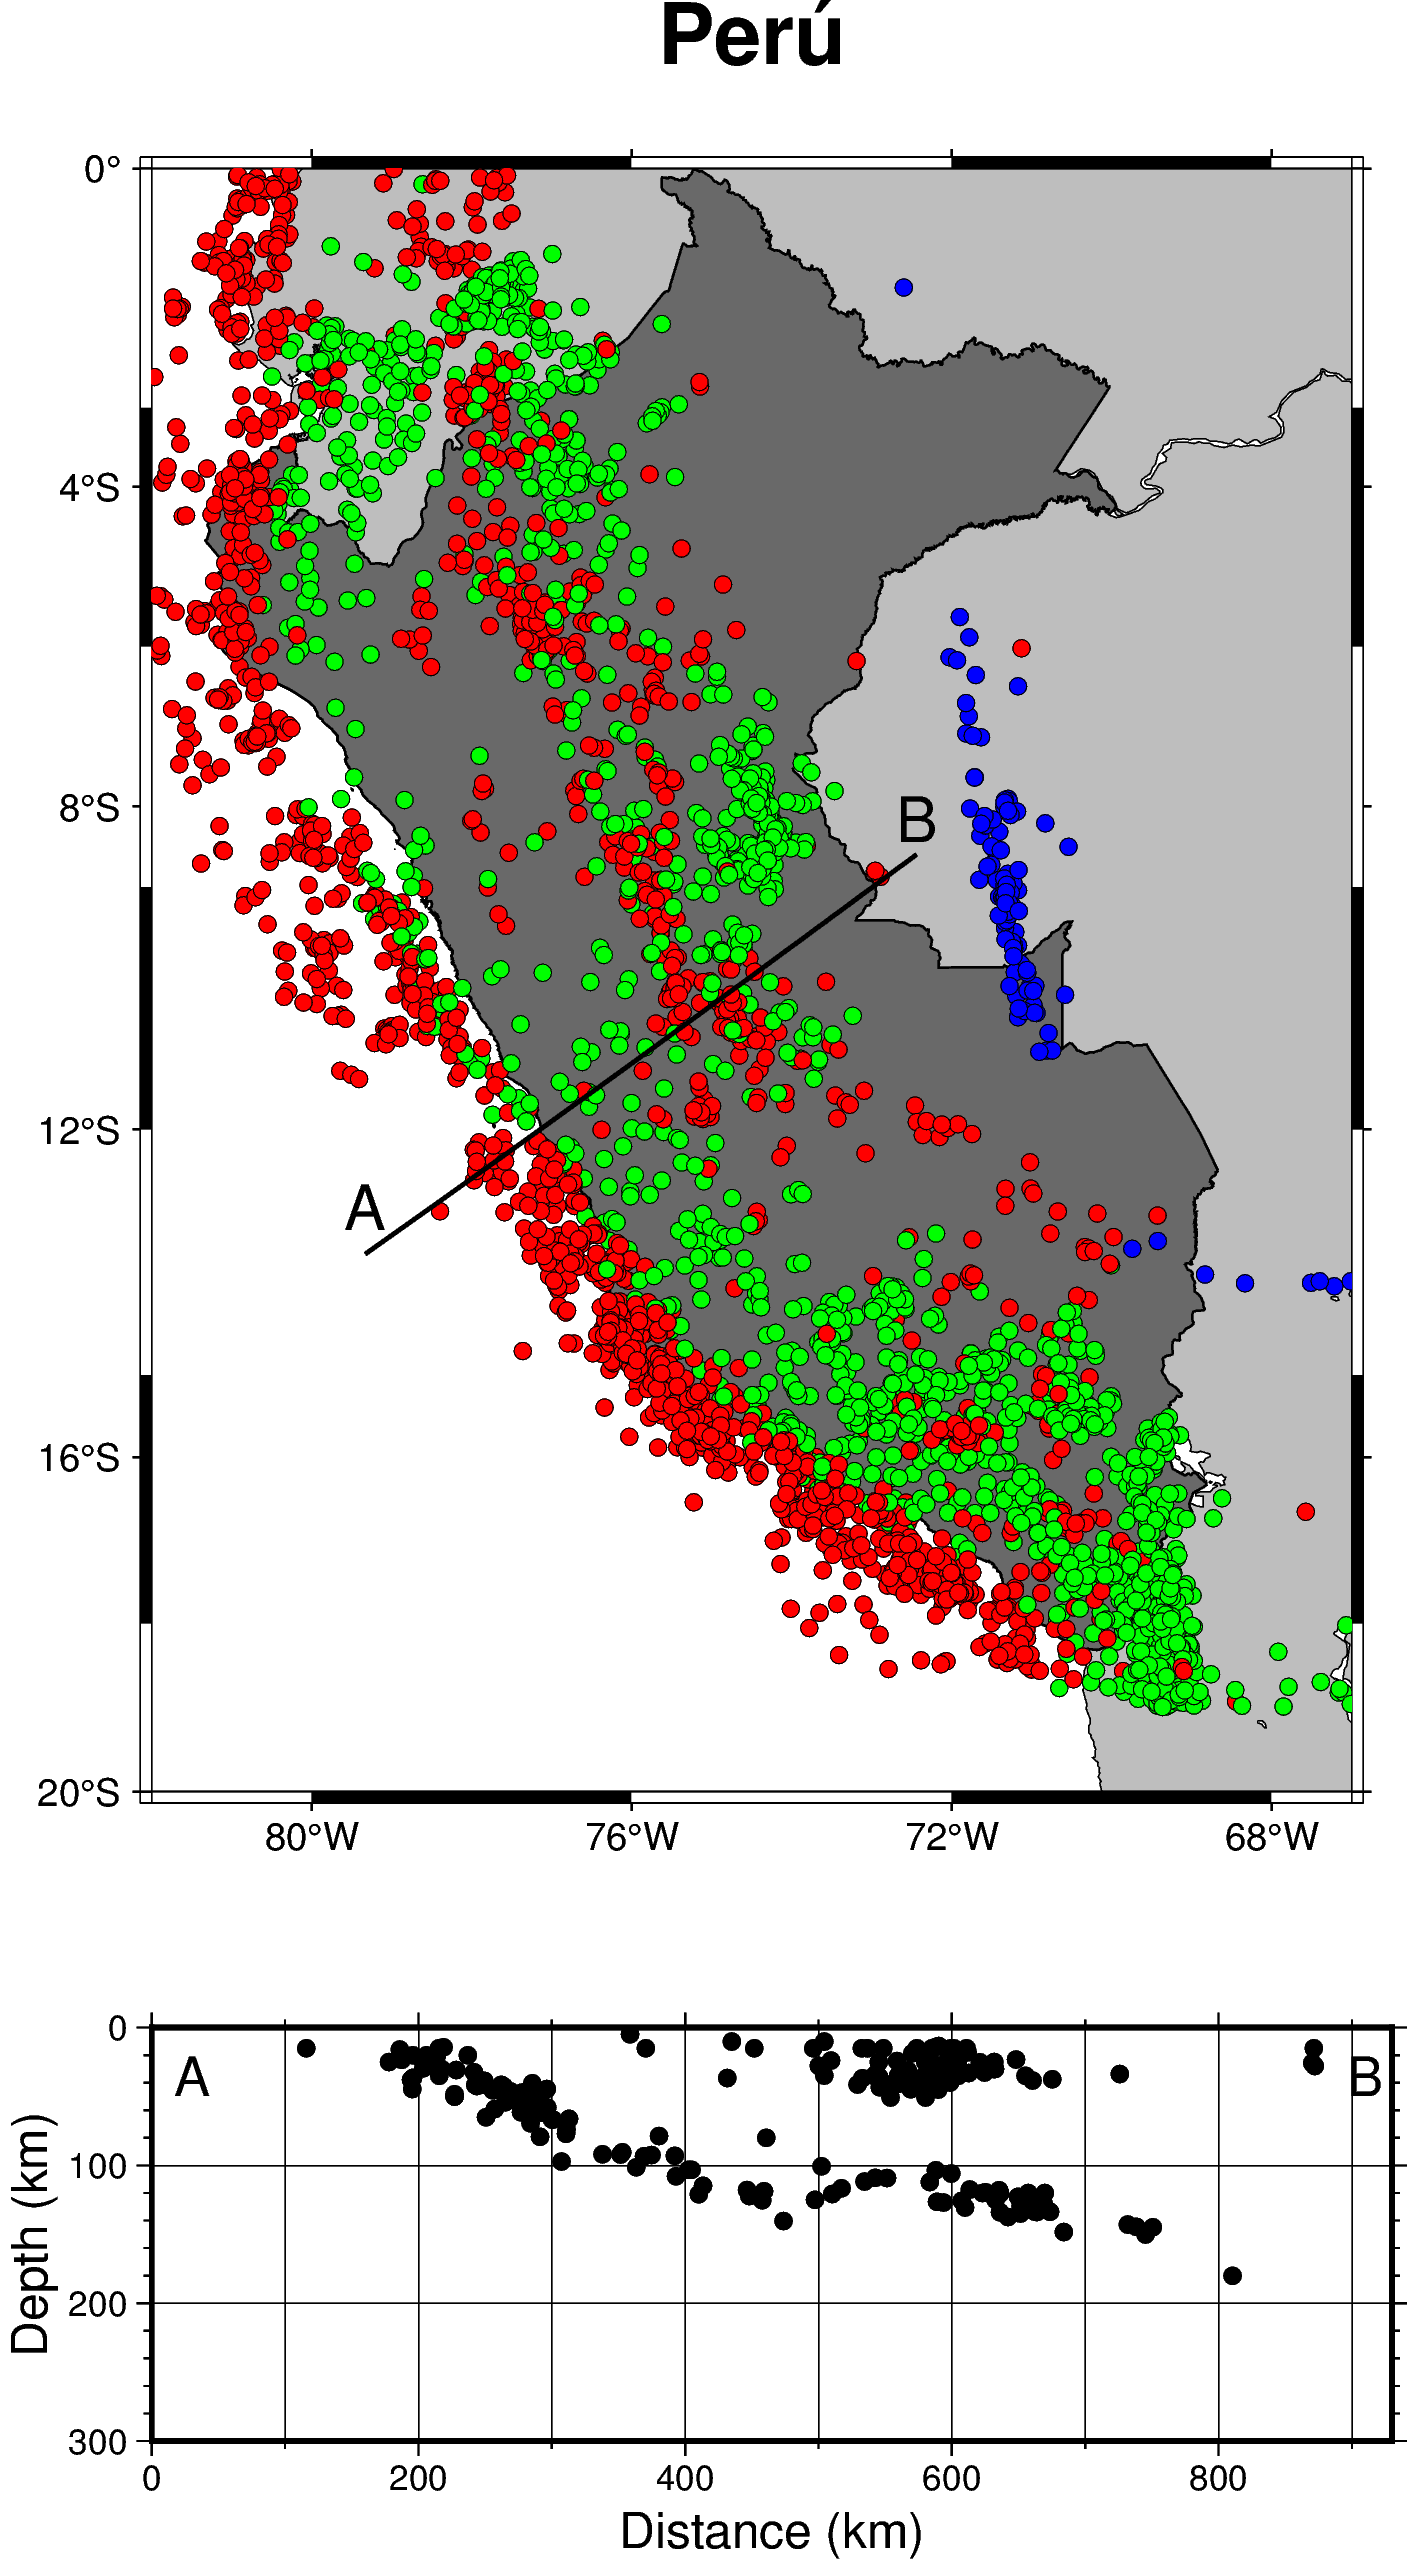

In [18]:
# Seismic cross section
import pygmt


fig = pygmt.Figure()

pygmt.makecpt(cmap="red,green,blue", series="0,60,300,10000", output="quakes.cpt")

fig.coast(
    region=[-82, -67, -20, 0],
    projection="M4i",
    dcw=[
        # Great Britain (country code) with seagrean land
        "PE+gdimgray+p0.5p",],
    frame=["xa4", "ya4pf3", '+t"Perú"'],
    land="gray",
    shorelines="0.25p",
)
fig.plot(data="Catalogo_ISC-EHB.txt", pen="faint", style="c0.15", cmap="quakes.cpt")
fig.plot(x=[-79.33, -72.44], y=[-13.53, -8.60], pen=1)
fig.text(x=-79.33, y=-13.53, text="A", font="15,Helvetica", offset="0c/0.4c")
fig.text(x=-72.44, y=-8.60, text="B", font="15,Helvetica", offset="0c/0.3c")
#
fig.shift_origin(yshift="-5.5c")
pygmt.project(
    data="Catalogo_ISC-EHB.txt",
    unit=True,
    center=[-79.33, -13.53],
    endpoint=[-72.44, -8.60],
    convention="pz",
    width=[-100, 100],
    length="w",
    outfile="cross.dat",
    sort=True,
)
fig.basemap(
    projection="X10.5/-3.5",
    region=[0,930, 0, 300],
    frame=['xafg100+l"Distance (km)"', 'yafg100+l"Depth (km)"', "WSen"],
)
fig.plot(data="cross.dat", projection="X", style="c0.15", pen=0.2, fill="black")
fig.text(x=30, y=35, text="A", font="13,Helvetica")
fig.text(x=910, y=35, text="B", font="13,Helvetica")

fig.savefig(fname="Peru.pdf")
fig.show()